In [1]:
# reolve imports
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# load the dataset
filepath = 'C:\\Users\\HP\\Desktop\\EstateVerse-Geospatial-Model\\Data Pre-processing\\training_data.csv'
df = pd.read_csv(filepath)
df

,Unnamed: 0,Average Price,parking,restaurant,fire_station,cinema,dentist,school,atm,fuel,...,hospital,community_centre,vending_machine,bus_station,health_post,college,theatre,marketplace,Latitude,Longitude
0,0,3461.989452,-0.001228,-0.002738,-0.005143,0.000025,0.011098,-0.008541,-0.010881,0.008954,...,1744.311680,-0.013537,-0.000936,-0.013797,0.010241,0.007958,0.010391,-0.002424,17.322011,78.124018
1,1,3461.990873,0.008124,0.010864,0.006972,0.009906,-0.000586,0.011880,0.011326,0.010778,...,1744.289818,0.012065,0.007551,-0.004203,-0.012195,0.014034,0.003958,-0.006272,17.308007,78.125248
2,2,3461.987961,-0.014165,0.004094,-0.008962,0.006022,-0.011658,0.013226,0.004525,-0.001419,...,1744.299518,-0.002921,0.009468,0.005861,0.010245,0.002252,0.003792,-0.013570,17.314100,78.129774
3,3,3461.985465,0.009461,0.002297,-0.014557,0.006431,0.009453,0.008855,-0.000853,-0.006646,...,1744.305074,-0.006494,0.008406,0.011385,0.003049,-0.013258,0.011260,0.009435,17.302859,78.132181
4,4,3461.995490,0.014694,-0.005821,0.007945,0.004588,-0.013690,-0.008849,0.001601,0.010481,...,1744.313505,0.013626,-0.006272,-0.000107,0.002980,0.006469,0.009152,-0.006133,17.322623,78.149956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,11355,198168.988577,14431.440597,105862.622831,-0.011109,15200.606743,-0.001161,16494.041153,37953.457181,8146.245130,...,107266.285259,1949.026511,0.011539,2067.687173,9049.527429,7360.863899,5093.319492,784.883202,17.426625,78.444911
11356,11356,198169.009540,14431.433309,105862.622064,0.006073,15200.610727,-0.005140,16494.045153,37953.472184,8146.231776,...,107266.268268,1949.011716,0.002869,2067.685678,9049.508855,7360.870439,5093.328836,784.879566,17.412021,78.442968
11357,11357,198168.992959,14431.437324,105862.632761,0.007844,15200.613883,0.005234,16494.039854,37953.460543,8146.223418,...,107266.291387,1949.005171,-0.008774,2067.682242,9049.532121,7360.875273,5093.322961,784.895835,17.414005,78.441009
11358,11358,198169.004870,14431.429121,105862.626621,0.014212,15200.611976,0.001724,16494.040444,37953.475769,8146.241841,...,107266.278527,1949.019913,-0.014707,2067.694381,9049.513657,7360.865148,5093.333106,784.895028,17.418988,78.450364


In [4]:
df = df.drop(columns='Unnamed: 0')
df

,Average Price,parking,restaurant,fire_station,cinema,dentist,school,atm,fuel,fast_food,...,hospital,community_centre,vending_machine,bus_station,health_post,college,theatre,marketplace,Latitude,Longitude
0,3461.989452,-0.001228,-0.002738,-0.005143,0.000025,0.011098,-0.008541,-0.010881,0.008954,0.000843,...,1744.311680,-0.013537,-0.000936,-0.013797,0.010241,0.007958,0.010391,-0.002424,17.322011,78.124018
1,3461.990873,0.008124,0.010864,0.006972,0.009906,-0.000586,0.011880,0.011326,0.010778,0.005465,...,1744.289818,0.012065,0.007551,-0.004203,-0.012195,0.014034,0.003958,-0.006272,17.308007,78.125248
2,3461.987961,-0.014165,0.004094,-0.008962,0.006022,-0.011658,0.013226,0.004525,-0.001419,0.000725,...,1744.299518,-0.002921,0.009468,0.005861,0.010245,0.002252,0.003792,-0.013570,17.314100,78.129774
3,3461.985465,0.009461,0.002297,-0.014557,0.006431,0.009453,0.008855,-0.000853,-0.006646,-0.005788,...,1744.305074,-0.006494,0.008406,0.011385,0.003049,-0.013258,0.011260,0.009435,17.302859,78.132181
4,3461.995490,0.014694,-0.005821,0.007945,0.004588,-0.013690,-0.008849,0.001601,0.010481,-0.002901,...,1744.313505,0.013626,-0.006272,-0.000107,0.002980,0.006469,0.009152,-0.006133,17.322623,78.149956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,198168.988577,14431.440597,105862.622831,-0.011109,15200.606743,-0.001161,16494.041153,37953.457181,8146.245130,26596.267568,...,107266.285259,1949.026511,0.011539,2067.687173,9049.527429,7360.863899,5093.319492,784.883202,17.426625,78.444911
11356,198169.009540,14431.433309,105862.622064,0.006073,15200.610727,-0.005140,16494.045153,37953.472184,8146.231776,26596.286219,...,107266.268268,1949.011716,0.002869,2067.685678,9049.508855,7360.870439,5093.328836,784.879566,17.412021,78.442968
11357,198168.992959,14431.437324,105862.632761,0.007844,15200.613883,0.005234,16494.039854,37953.460543,8146.223418,26596.286001,...,107266.291387,1949.005171,-0.008774,2067.682242,9049.532121,7360.875273,5093.322961,784.895835,17.414005,78.441009
11358,198169.004870,14431.429121,105862.626621,0.014212,15200.611976,0.001724,16494.040444,37953.475769,8146.241841,26596.268929,...,107266.278527,1949.019913,-0.014707,2067.694381,9049.513657,7360.865148,5093.333106,784.895028,17.418988,78.450364


In [15]:
X = df.drop(columns=' Average Price', axis=1)
y = df[' Average Price']

In [17]:
X = X.drop(columns='Unnamed: 0')
X

,parking,restaurant,fire_station,cinema,dentist,school,atm,fuel,fast_food,toilets,...,hospital,community_centre,vending_machine,bus_station,health_post,college,theatre,marketplace,Latitude,Longitude
0,-0.001228,-0.002738,-0.005143,0.000025,0.011098,-0.008541,-0.010881,0.008954,0.000843,-0.009114,...,1744.311680,-0.013537,-0.000936,-0.013797,0.010241,0.007958,0.010391,-0.002424,17.322011,78.124018
1,0.008124,0.010864,0.006972,0.009906,-0.000586,0.011880,0.011326,0.010778,0.005465,-0.007376,...,1744.289818,0.012065,0.007551,-0.004203,-0.012195,0.014034,0.003958,-0.006272,17.308007,78.125248
2,-0.014165,0.004094,-0.008962,0.006022,-0.011658,0.013226,0.004525,-0.001419,0.000725,-0.001994,...,1744.299518,-0.002921,0.009468,0.005861,0.010245,0.002252,0.003792,-0.013570,17.314100,78.129774
3,0.009461,0.002297,-0.014557,0.006431,0.009453,0.008855,-0.000853,-0.006646,-0.005788,-0.007765,...,1744.305074,-0.006494,0.008406,0.011385,0.003049,-0.013258,0.011260,0.009435,17.302859,78.132181
4,0.014694,-0.005821,0.007945,0.004588,-0.013690,-0.008849,0.001601,0.010481,-0.002901,0.014476,...,1744.313505,0.013626,-0.006272,-0.000107,0.002980,0.006469,0.009152,-0.006133,17.322623,78.149956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,14431.440597,105862.622831,-0.011109,15200.606743,-0.001161,16494.041153,37953.457181,8146.245130,26596.267568,-0.010431,...,107266.285259,1949.026511,0.011539,2067.687173,9049.527429,7360.863899,5093.319492,784.883202,17.426625,78.444911
11356,14431.433309,105862.622064,0.006073,15200.610727,-0.005140,16494.045153,37953.472184,8146.231776,26596.286219,0.012594,...,107266.268268,1949.011716,0.002869,2067.685678,9049.508855,7360.870439,5093.328836,784.879566,17.412021,78.442968
11357,14431.437324,105862.632761,0.007844,15200.613883,0.005234,16494.039854,37953.460543,8146.223418,26596.286001,-0.004482,...,107266.291387,1949.005171,-0.008774,2067.682242,9049.532121,7360.875273,5093.322961,784.895835,17.414005,78.441009
11358,14431.429121,105862.626621,0.014212,15200.611976,0.001724,16494.040444,37953.475769,8146.241841,26596.268929,0.012501,...,107266.278527,1949.019913,-0.014707,2067.694381,9049.513657,7360.865148,5093.333106,784.895028,17.418988,78.450364


In [18]:
y

0          3461.989452
1          3461.990873
2          3461.987961
3          3461.985465
4          3461.995490
             ...      
11355    198168.988577
11356    198169.009540
11357    198168.992959
11358    198169.004870
11359    198169.006257
Name:  Average Price, Length: 11360, dtype: float64

In [19]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
# create and run the model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 12)

model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12, n_jobs=None,
             num_parallel_tree=None, ...)

In [21]:
# Get feature importances
feature_importances = model.feature_importances_

In [22]:
# Print feature importances
for column, importance in zip(X.columns, feature_importances):
    print(f"{column}: {importance}")

parking: 0.020454345270991325
restaurant: 0.014747964218258858
fire_station: 0.0002659126475919038
cinema: 0.014325855299830437
dentist: 0.009598617441952229
school: 0.00932761374861002
atm: 0.05223919078707695
fuel: 0.007926947437226772
fast_food: 0.0
toilets: 0.0576338917016983
pharmacy: 0.13694193959236145
bank: 0.06399087607860565
police: 0.008557197637856007
post_box: 0.022658219560980797
place_of_worship: 0.04103333503007889
bar: 0.01835380494594574
pub: 0.2629382908344269
cafe: 0.013143093325197697
clinic: 0.014405529014766216
hospital: 0.036351095885038376
community_centre: 0.00623058108612895
vending_machine: 0.0014077986124902964
bus_station: 0.023431848734617233
health_post: 0.028796622529625893
college: 0.00885864906013012
theatre: 0.06422109156847
marketplace: 0.023319972679018974
Latitude: 0.03084345906972885
Longitude: 0.007996303029358387


In [23]:
# make features.csv file
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = feature_importances
features.to_csv('C:\\Users\\HP\\Desktop\\EstateVerse-Geospatial-Model\\Data Pre-processing\\features.csv', index=False)

In [25]:
# make predictions for test data
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test are the true values and y_pred are the predicted values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 184907241.53580862
Mean Absolute Error: 10581.432990890233
R^2 Score: 0.9002675846434094


In [28]:
y_pred

array([ 27444.613, 155383.77 ,  36164.984, ...,  29695.213,  80779.195,
       155383.77 ], dtype=float32)

In [29]:
y_test

101        3461.986356
11335    198169.011111
4414      28857.990034
200        6482.996604
5384      32539.992047
             ...      
8975      88359.003845
10364     97593.992475
3143      23158.009953
9884      95239.998523
11330    198168.994855
Name:  Average Price, Length: 2272, dtype: float64

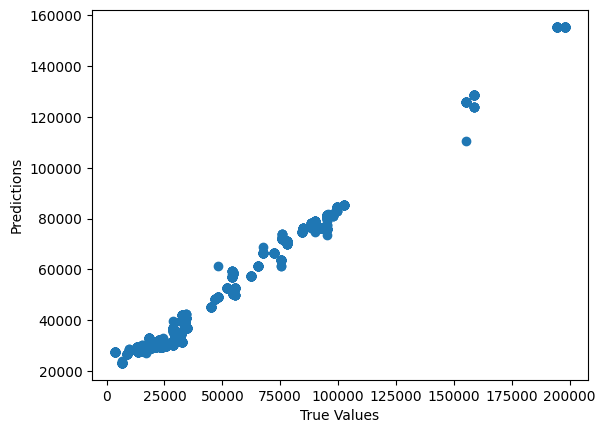

In [26]:
# plot y_pred and y_test
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


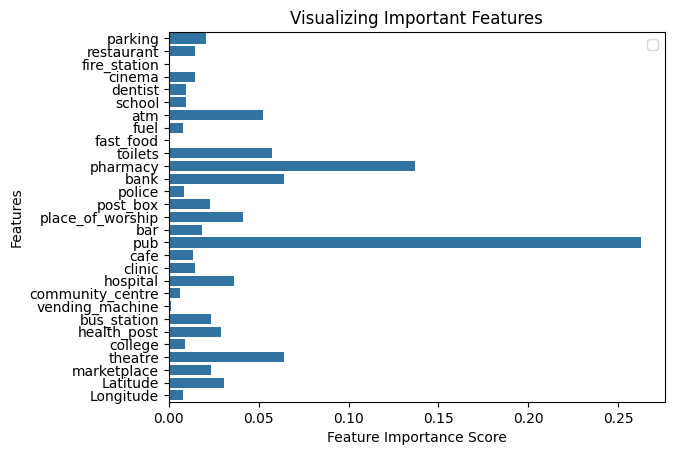

In [27]:
# plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature importances
sns.barplot(x=feature_importances, y=X.columns)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()